# Analyzing Green Fox HQ logs

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
entry_log=pd.read_csv("logs.csv") 

In [157]:
entry_log["date"]=""
entry_log["time"]=""
entry_log

,Id,Date and Time,Event message,Event number,Object #1,Description #1,Object #2,Description #2,Object #3,Description #3,Object #4,Description #4,Card number,date,time
0,1,2019.01.02. 9:21:49,Access granted,203,12,A66 - 04 FÕBEJÁRAT (F-1) Door #1,5,Czender András,0,NaN,0,NaN,00215:09895,,
1,2,2019.01.02. 9:22:54,Access granted,203,12,A66 - 17 Recepció (3-1) Door #1,5,Czender András,0,NaN,0,NaN,00215:09895,,
2,3,2019.01.02. 9:29:15,Access granted,203,12,A66 - 12 Recepció (2-1) Door #1,5,Puskás Nóra,0,NaN,0,NaN,00059:58046,,
3,4,2019.01.02. 9:31:19,Access granted,203,12,A66 - 17 Recepció (3-1) Door #1,5,Puskás Nóra,0,NaN,0,NaN,00059:58046,,
4,5,2019.01.02. 9:36:51,Access granted,203,12,A66 - 04 FÕBEJÁRAT (F-1) Door #1,5,Ripka Péter,0,NaN,0,NaN,00110:57041,,
5,6,2019.01.02. 9:38:00,Access granted,203,12,A66 - 17 Recepció (3-1) Door #1,5,Ripka Péter,0,NaN,0,NaN,00110:57041,,
6,7,2019.01.02. 9:44:46,Access granted,203,12,A66 - 04 FÕBEJÁRAT (F-1) Door #1,5,Szívós István,0,NaN,0,NaN,00008:58673,,
7,8,2019.01.02. 9:46:16,Access granted,203,12,A66 - 17 Recepció (3-1) Door #1,5,Szívós István,0,NaN,0,NaN,00008:58673,,
8,9,2019.01.02. 10:02:19,Access granted,203,12,A66 - 04 FÕBEJÁRAT (F-1) Door #1,5,Megyaszai Dániel,0,NaN,0,NaN,00055:39162,,
9,10,2019.01.02. 10:03:26,Access granted,203,12,A66 - 17 Recepció (3-1) Door #1,5,Megyaszai Dániel,0,NaN,0,NaN,00055:39162,,


# mean, median,deviation of the arrival time

In [97]:
arrival_time=entry_log[entry_log['Description #1'] == "A66 - 04 FÕBEJÁRAT (F-1) Door #1"]["Date and Time"]
arrival_time_index=list(arrival_time.index)
time=[]
for date_time in arrival_time:
    time_parts=date_time.split()[-1].split(":")
    time.append(time_parts)
time_in_seconds=[]

for t in time:
    time_in_seconds.append(int(t[0])*3600+int(t[1])*60+int(t[2]))
time_in_seconds=pd.Series(time_in_seconds)
mean_time = time_in_seconds.mean()
median_time=time_in_seconds.median()
deviation_time=time_in_seconds.std()

print("the mean time is:", calculate_time(mean_time))
print("the median time is:", calculate_time(median_time))
print("the standard deviation time is:", calculate_time(deviation_time))

the mean time is: 11:32:52
the median time is: 10:36:40
the standard deviation time is: 2:57:26


In [60]:
def calculate_time(time_in_seconds):
    time=time_in_seconds
    hour  =time_in_seconds//3600
    time -= hour*3600
    minute =time//60
    seconds =time-minute*60
    return f"{int(hour)}:{int(minute)}:{round(seconds)}"


# late arrival

In [103]:
late_time=[]
late_time_inedx=[]
for date_time,ind in zip(arrival_time,arrival_time_index):
    time_parts=date_time.split()[-1].split(":")
    if int(time_parts[0])>9 or (int(time_parts[0])==9 and (int(time_parts[1])>0 or int(time_parts[2])>0)):
        late_time.append(time_parts)
        late_time_inedx.append(ind)
late_time_minutes=[]
for t in late_time:
    late_time_minutes.append(int(t[0])*60+int(t[1])+round(int(t[2])/60)-9*60)
late_time_minutes=pd.Series(late_time_minutes)

most_late_person_index= late_time_inedx[late_time_minutes[late_time_minutes==late_time_minutes.max()].index[0]]
most_late_minutes=late_time_minutes.max()
most_late_person_name=entry_log.loc[most_late_person_index]["Description #2"]
most_late_card_number=entry_log.loc[most_late_person_index]["Card number"]

print(f"the average late time in minute is: {late_time_minutes.mean()} minutes",)
print(f"the median late time in minute is: {late_time_minutes.median()} minutes",)
print(f"the person: {most_late_person} with card number {most_late_card_number} was late for {most_late_minutes} minutes")

the mean late time in minute is: 235.49793103448275 minutes
the median late time in minute is: 241.0 minutes
the person: Szõke Tamás with card number 00152:06741 was late for 657 minutes


In [159]:
for date_time,ind in zip(entry_log["Date and Time"],entry_log.index):
    date=date_time.split()[0]
    time=date_time.split()[1]
    entry_log.loc[ind,"date"]=date
    entry_log.loc[ind,"time"]=time
   

In [165]:
entry_log

,Id,Date and Time,Event message,Event number,Object #1,Description #1,Object #2,Description #2,Object #3,Description #3,Object #4,Description #4,Card number,date,time
0,1,2019.01.02. 9:21:49,Access granted,203,12,A66 - 04 FÕBEJÁRAT (F-1) Door #1,5,Czender András,0,NaN,0,NaN,00215:09895,2019.01.02.,9:21:49
1,2,2019.01.02. 9:22:54,Access granted,203,12,A66 - 17 Recepció (3-1) Door #1,5,Czender András,0,NaN,0,NaN,00215:09895,2019.01.02.,9:22:54
2,3,2019.01.02. 9:29:15,Access granted,203,12,A66 - 12 Recepció (2-1) Door #1,5,Puskás Nóra,0,NaN,0,NaN,00059:58046,2019.01.02.,9:29:15
3,4,2019.01.02. 9:31:19,Access granted,203,12,A66 - 17 Recepció (3-1) Door #1,5,Puskás Nóra,0,NaN,0,NaN,00059:58046,2019.01.02.,9:31:19
4,5,2019.01.02. 9:36:51,Access granted,203,12,A66 - 04 FÕBEJÁRAT (F-1) Door #1,5,Ripka Péter,0,NaN,0,NaN,00110:57041,2019.01.02.,9:36:51
5,6,2019.01.02. 9:38:00,Access granted,203,12,A66 - 17 Recepció (3-1) Door #1,5,Ripka Péter,0,NaN,0,NaN,00110:57041,2019.01.02.,9:38:00
6,7,2019.01.02. 9:44:46,Access granted,203,12,A66 - 04 FÕBEJÁRAT (F-1) Door #1,5,Szívós István,0,NaN,0,NaN,00008:58673,2019.01.02.,9:44:46
7,8,2019.01.02. 9:46:16,Access granted,203,12,A66 - 17 Recepció (3-1) Door #1,5,Szívós István,0,NaN,0,NaN,00008:58673,2019.01.02.,9:46:16
8,9,2019.01.02. 10:02:19,Access granted,203,12,A66 - 04 FÕBEJÁRAT (F-1) Door #1,5,Megyaszai Dániel,0,NaN,0,NaN,00055:39162,2019.01.02.,10:02:19
9,10,2019.01.02. 10:03:26,Access granted,203,12,A66 - 17 Recepció (3-1) Door #1,5,Megyaszai Dániel,0,NaN,0,NaN,00055:39162,2019.01.02.,10:03:26


In [203]:
all_date=entry_log["date"].value_counts()
all_date

2019.01.16.    684
2019.01.24.    677
2019.01.29.    647
2019.01.15.    643
2019.01.22.    631
2019.01.18.    630
2019.01.21.    616
2019.01.28.    615
2019.01.17.    614
2019.01.25.    603
2019.01.23.    597
2019.01.30.    582
2019.01.31.    564
2019.01.14.    474
2019.01.10.    362
2019.01.09.    339
2019.01.11.    312
2019.01.08.    296
2019.01.07.    276
2019.01.04.     87
2019.01.03.     85
2019.01.19.     70
2019.01.02.     54
2019.01.05.     20
2019.01.26.      2
Name: date, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

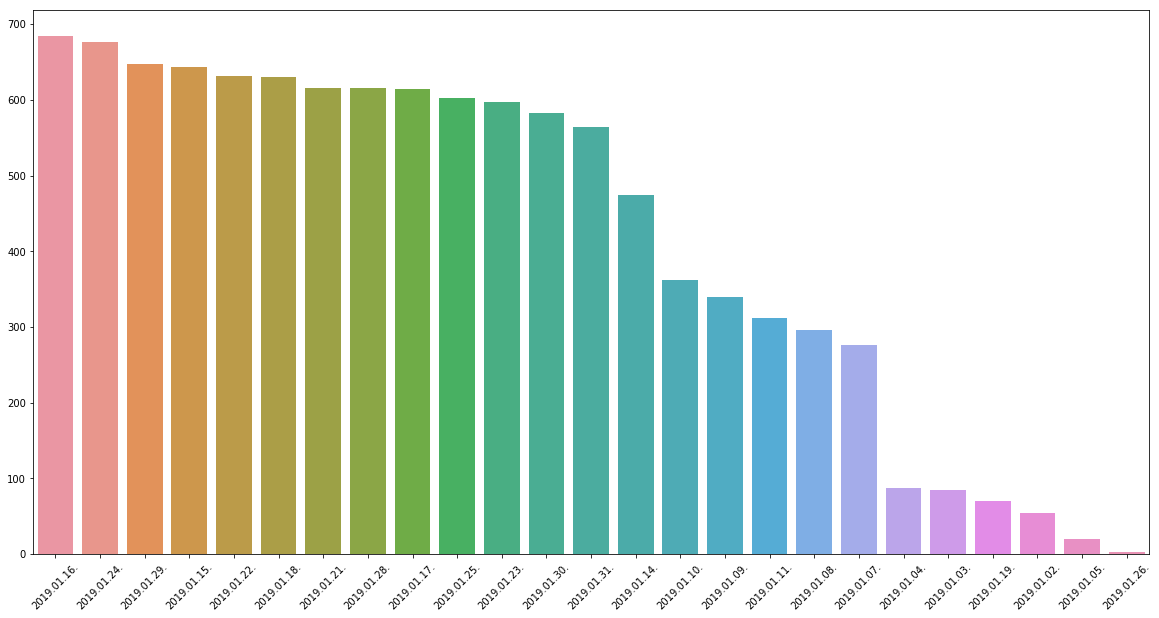

In [200]:
plt.figure(figsize=(20,10))
g=sns.barplot(entry_log["date"].value_counts().index,entry_log["date"].value_counts().values)
plt.xticks(rotation=45)
plt.show

In [231]:
# entry_log["Description #2"].value_counts()
sorted(all_date.index).index('2019.01.14.')

9

In [225]:
after_holiday=sorted(all_date.index)[9:]

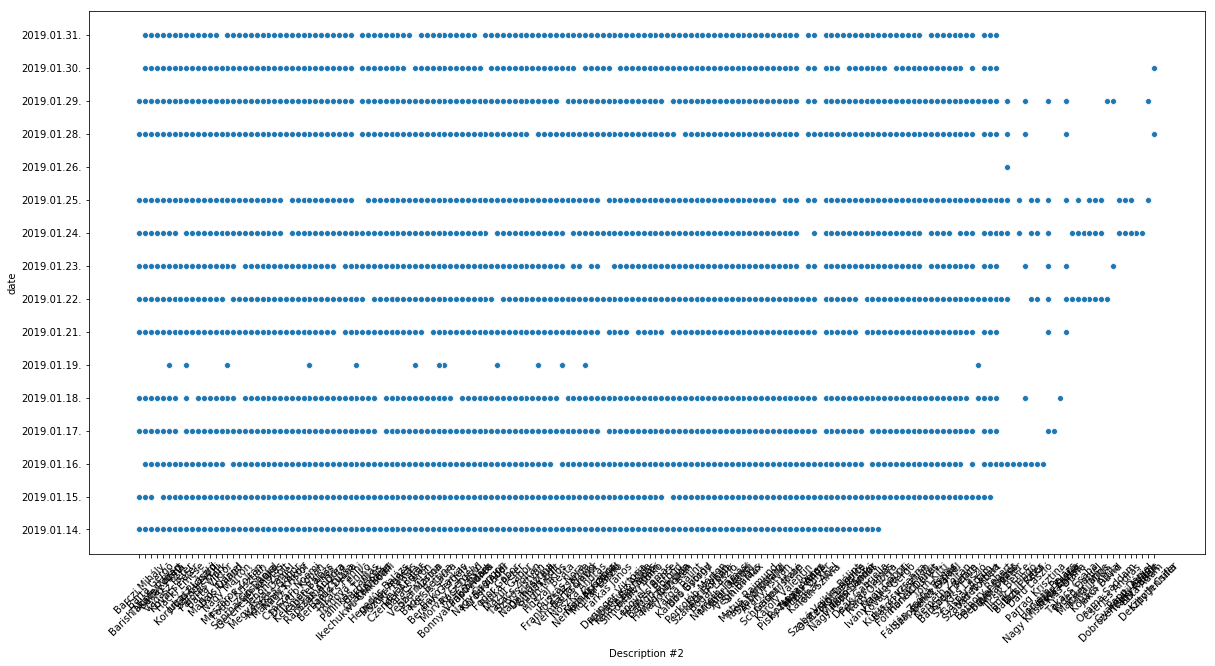

In [228]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
data=entry_log[entry_log["date"].isin(after_holiday)]
sns.scatterplot(x="Description #2",y="date",data=data)

### Array datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
x = np.array([1, 2])  # Let numpy choose the datatype
x.dtype     

In [ ]:
x = np.array([1.0, 2.0])  # Let numpy choose the datatype
x.dtype         

In [ ]:
x = np.array([1, 2], dtype=np.int64)  # Force a particular datatype
x.dtype            

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [ ]:
x = np.array([[1, 2], [3, 4]], dtype=np.float64)
x

In [ ]:
y = np.array([[5, 6], [7, 8]], dtype=np.float64)
y

#### Elementwise sum, equivalent expressions:

In [ ]:
x + y

In [ ]:
np.add(x, y)

#### Elementwise difference, equivalent expressions:

In [ ]:
x - y

In [ ]:
np.subtract(x, y)

#### Elementwise product, equivalent expressions:

In [ ]:
x * y

In [ ]:
np.multiply(x, y)

#### Elementwise division, equivalent expressions:

In [ ]:
x / y

In [ ]:
np.divide(x, y)

#### Elementwise square root

In [ ]:
np.sqrt(x)

#### Dot product and matrix multiplicaiton

Note that unlike MATLAB, * is elementwise multiplication, not matrix multiplication. We instead use the `np.dot` function or `.dot` method to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. `dot` is available both as a function in the numpy module and as an instance method of array objects:

In [ ]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])
v = np.array([9, 10])
w = np.array([11, 12])

##### Inner product of vectors

In [ ]:
np.dot(v, w)

##### Matrix vector product

In [ ]:
x.dot(v)  # using x's method

In [ ]:
np.dot(x, v)  # using the numpy function

##### Matrix matrix product

In [ ]:
x.dot(y)  # using x's method

In [ ]:
np.dot(x, y)  # using the numpy function

### Mathematical functions

Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [ ]:
x = np.array([[1, 2], [3, 4]])
x

In [ ]:
np.sum(x)  # Compute sum of all elements

In [ ]:
np.sum(x, axis=0)  # Compute sum of each column - sum *over rows* i.e. dimension 0

In [ ]:
np.sum(x, axis=1)  # Compute sum of each row - sum *over columns* i.e. dimension 1

You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).


Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the `T` attribute of an array object:

In [ ]:
x = np.arange(4).reshape((2, 2))
x

In [ ]:
x.T

In [ ]:
np.transpose(x) # Equivalent expression

In [ ]:
# Note that taking the transpose of a rank 1 array (a vector) does nothing:
v = np.array([1, 2, 3])
v

In [ ]:
v.T

In [ ]:
x.reshape((4, 1))

In [ ]:
x.reshape((4,))

In [ ]:
y = np.arange(27).reshape((3, 3, 3))
y

In [ ]:
y.shape

In [ ]:
y.reshape((3, -1))

In [ ]:
y.reshape((3, -1)).shape

### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. 

In [ ]:
x = np.arange(12).reshape((4, 3))
x

In [ ]:
v = np.array([1, 0, 1])
v

In [ ]:
x + v  # Add v to each row of x using broadcasting

`x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

* If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
* The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
* The arrays can be broadcast together if they are compatible in all dimensions.
* After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
* In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension.

So be careful with shapes...

In [ ]:
y = x.T
y

In [ ]:
try:
    y + v  # Add v to each column of y using broadcasting...?
except ValueError as e:
    print(e)
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

And especially careful with vectors!

In [ ]:
try:
    y + v.T  # Add v to each column of y using broadcasting...?
except ValueError as e:
    print(e)
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

In [ ]:
y + v.reshape((3, 1))  # Add v to each column of y using broadcasting!

In [ ]:
print('x shape:', x.shape)
print('v shape:', v.shape)
print('y shape:', y.shape)

### Numpy documentation

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](https://docs.scipy.org/doc/numpy-1.13.0/reference/) to find out much more about numpy.

## ======= Pandas introduction  =======

Pandas is a library for data manipulation and analysis. There are two fundamental data structures in pandas: the **Series** and **DataFrame** structures which are built on top of NumPy arrays.

The following introduction is largely based on this [tutorial](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/). Another useful referece is the [Pandas introduction to data structures](http://pandas.pydata.org/pandas-docs/stable/dsintro.html). Pandas is well documented and you will find good information about all methods and structures in the [API reference](http://pandas.pydata.org/pandas-docs/stable/api.html)

### Series

A **Series** a one-dimensional object (similar to a vector). Each element has a corresponding *index*. By default the indices range from 0 to N, where N is the length of the Series.

In [ ]:
# Let's create a Series by passing in a list without specifying the indices.
s = pd.Series([1, 4.2, 'Hello'])
s

In [ ]:
# Now, let's specify the indices explicitly
s = pd.Series([1, 4.2, 'Hello'], index=['A', 'B', 'C'])
s

In [ ]:
# Indexing the Series
s['B']

In [ ]:
# We can also index by using boolean logic
s[s > 2]

### DataFrame

A DataFrame is a tabular data structure comprised of rows and columns. You can also think of the DataFrame as a collection of Series objects that share an index. 

#### Creating DataFrame structures

We can create an empty DataFrame by specifying the column names. Then we can insert data row by row.

In [ ]:
df = pd.DataFrame(columns=['Gender', 'Age', 'Height', 'Weight'])
df

In [ ]:
# Now let's add an observation
df.loc[0] = ['Male', 23, 180, 73]  # Note how we used .loc to specify the index
df.loc['A'] = ['Female', 27, 167, 59]
df

You can populate using a dictionary too which allows you to do things in a nonstandard order...

In [ ]:
df.loc['i'] = dict(Weight='3kgs', Age=10, Gender='Blue', Height=-12)
df

#### Creating DataFrame from other structures

You can also create a dataframe from:
* Dict of 1D ndarrays, lists, dicts, or Series
* 2-D numpy.ndarray
* Structured or record ndarray
* A Series
* Another DataFrame

For example:

In [ ]:
# Create a DataFrame from a list
some_list = [['Male', 23, 180, 73], ['Female', 27, 167, 59]]
df = pd.DataFrame(some_list, index=[0, 'A'], columns=['Gender', 'Age', 'Height', 'Weight'])
df

In [ ]:
# Create a DataFrame from a dictionary where keys are column values
column_key_dict = {
    'Gender': ['Male', 'Female'],
    'Age': [23, 27],
    'Height': [180, 167],
    'Weight': [73, 59]
}
df = pd.DataFrame.from_dict(column_key_dict, orient='columns')
df.index = [0, 'A']
df

In [ ]:
# Create a DataFrame from a dictionary where keys are index values
index_key_dict = {0:['Male', 23, 180, 73], 'A':['Female', 27, 167, 59]}
df = pd.DataFrame.from_dict(index_key_dict, orient='index')
df.columns = ['Gender', 'Age', 'Height', 'Weight']
df

In [ ]:
# Using the DataFrame call, keys are assumed to be column headers
df = pd.DataFrame({0:['Male', 23, 180, 73], 'A':['Female', 27, 167, 59]}, 
                   index=['Gender', 'Age', 'Height', 'Weight'])
df

In [ ]:
# ...we can transpose using the `.T` method

In [ ]:
df = df.T
df

#### Loading a CSV into a DataFrame

Most commonly we create DataFrame structures by reading csv files. To run the following piece of code you need to download the datasets associated with the course and place them in a subdirectory called "datasets" under the same directory that your notebooks are located. Alternatively, you can specify the full path of the .csv file.

In [ ]:
cpu_loc = os.path.join(os.getcwd(), 'datasets', 'cpu.csv')
cpu_loc

In [ ]:
cpu = pd.read_csv(cpu_loc)
cpu.head() # Head shows the first few elements (unless specified otherwise) of the DataFrame

You should see that each observation in our dataset comprises 8 measurements (attributes).

#### Basic methods for DataFrame objects
* `head(N)`: displays the first N elements of the DataFrame
* `tail(N)`: displays the last N elements of the DataFrame
* `info()`:  displays basic information about the variables
* `describe()`: displays summary statistics of the data

Execute the following cells and observe the outputs.

In [ ]:
cpu.tail(5)

In [ ]:
cpu.info()

In [ ]:
cpu.describe()

#### Column Selection

You can think of a DataFrame as a group of Series that share an index (in this case the column headers). This makes it easy to select specific **columns**.

In [ ]:
cpu['MMAX'].head(5)

In [ ]:
type(cpu['MMAX'])

To select multiple columns we simple need to pass a list of column names. The resulting object is another DataFrame.

In [ ]:
cpu[['MMIN', 'MMAX']].head(7)

In [ ]:
type(cpu[['MMIN', 'MMAX']].head(7)) # This is a DataFrame

#### Row selection

To select specific **observations (i.e. rows)** we need to pass in the corresponding indices. This operation is called *slicing*. The resulting structure is again a DataFrame.

In [ ]:
cpu[0:3]

In [ ]:
# This is equivalent to using .iloc
cpu.iloc[0:3]

#### Filtering

Now suppose that you want to select all the observations which have an MMAX value which is higher than 35000. It is easy to do that:

In [ ]:
cpu[cpu['MMAX'] > 35000]

Or equivalently:

In [ ]:
cpu[cpu.MMAX > 35000]

You can also filter the data by using multiple attributes:

In [ ]:
cpu[(cpu.MMAX > 35000) & (cpu.MMIN > 16000)]

We saw before how we can select rows by passing the index numbers. This most of the time works but very often our indices are not in linear ascending order. 

There are two basic methods of indexing DataFrame structures:
* `loc`: works on labels in the index
* `iloc`: works on the position in the index (so it only takes integers)

The following example should clarify the difference between label-based indexing (`loc`) and positional indexing (`iloc`)


In [ ]:
# First let's create a new dataframe
cpu_new = cpu[cpu['MMAX'] > 35000]
cpu_new

In [ ]:
cpu_new.loc[8:10] # Looks for the rows which are labelled 8 and 9

In [ ]:
cpu_new.iloc[0:2] # Look for the first and second rows (this yields the same result as before)

In [ ]:
# If we try the following we will get an empty DataFrame because there are no rows with labels 0 and 1.
cpu_new.loc[0:2]

In [ ]:
# The result is another DataFrame
type(cpu[0:2])

A very common scenario will be the following. We want to select specific observations and columns of a DataFrame and convert to a NumPy array so that we can use it for feature extraction, classification etc. This can be achieved by using the `values` method.

In [ ]:
# Select the first 10 observations and the "MMIN" and "MMAX" columns only and convert to numpy array.
cpu[:10][['MMIN', 'MMAX']].values

You can confirm that by using the `values` method the resulting object is a NumPy array.

#### Indexing - selecting rows and columns

*WARNING* - indexing is probably the most difficult part of pandas to get used to. If you get stuck [refer to the documentation on indexing](https://pandas.pydata.org/pandas-docs/stable/indexing.html).

Summary of DataFrame methods for indexing:
* iloc - ignore index labels, index like numpy with integer positions
* loc - use index labels

To illustrate, observe what happens when we reorder the rows of our dataframe.

In [ ]:
cpu.sort_values('ERP', inplace=True)

In [ ]:
cpu.iloc[:10]

In [ ]:
cpu.loc[:10]

Observe what happens if we change the label of one of the now first index

In [ ]:
cpu = cpu.rename(index={cpu.index[0]: 'A'})

In [ ]:
cpu.iloc[:10]

In [ ]:
try:
    cpu.loc[:10]
except TypeError as e:
    print(e)

For more, check out [Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

## Matplotlib introduction

Matplotlib is a 2D python plotting library with a similar interface to MATLAB's plot engine. The library is fully compatible with NumPy which means that we can -and most of the times will- pass numpy arrays as input arguments to the various plotting functions.

There are many [resources](http://matplotlib.org/resources/index.html) for learning how to use Matplotlib. The following examples demonstrate only some basic plotting functions. When you are looking for a particular feature which you don't know yet how to implement a web search can prove very useful.

In [ ]:
# The first example creates a sine and a cosine and plots them.
X = np.linspace(-np.pi, np.pi, 256,endpoint=True) # Evenly spaced numbers over the specified interval
C, S = np.cos(X), np.sin(X) # Create a sine (S) and a cosine (C)

plt.figure(figsize=(8,5)) # Instantiates figure with a specified size
plt.plot(X,C, label='Cosine')
plt.plot(X,S, label='Sine')
plt.legend() # Displays legend
plt.show()

In [ ]:
# Create 4 subplots and plot cosines with different colours, linestyels and linewidths.
X = np.linspace(-np.pi, np.pi, 256,endpoint=True) # Evenly spaced numbers over the specified interval
C1, C2, C3, C4 = np.cos(X), np.cos(X+0.5), np.cos(X+1.), np.cos(X+1.5)

fig, ax = plt.subplots(figsize=(7,7))
plt.subplot(2,2,1)
plt.plot(X, C1)
plt.title('C1')
plt.xticks([]) # Removes xticks
plt.subplot(2,2,2)
plt.plot(X, C2, color='green',  linestyle='-.')
plt.title('C2')
plt.xticks([]) # Removes xticks
plt.yticks([]) # Removes yticks
plt.subplot(2,2,3)
plt.plot(X, C3, color='k', linestyle='--')
plt.title('C3')
plt.subplot(2,2,4)
plt.plot(X, C4, color='m', linewidth = 5.)
plt.title('C4')
plt.yticks([]) # Removes yticks
plt.show()

Another way to reference subplots is using the Axes objects. This code acheives the same thing as above but, instead of using the package api functions, it uses the Axes object methods:

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(7,7), sharex=True, sharey=True)
# ax is a 2 x 2 numpy array at this point containing the Axes objects
ax = ax.flatten()  # this simply flattens the array such that we can reference by a single index
ax[0].plot(X, C1)
ax[0].set_title('C1')
ax[1].plot(X, C2, color='green',  linestyle='-.')
ax[1].set_title('C2')
ax[2].plot(X, C3, color='k', linestyle='--')
ax[2].set_title('C3')
ax[3].plot(X, C4, color='m', linewidth = 5.)
ax[3].set_title('C4')
plt.show()

**N.B. Because we created the subplots up front and stated the axes should be the same, matplotlib intelligently labels the axes for us**

In [ ]:
# Plot a histogram and add some text
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000) # Generate data from a normal distribution with mean mu and variance sigma

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$') # Adds some text by using TeX
plt.axis([40, 160, 0, 0.03]) # Sets the axes limits
plt.grid(True) # Enables grid
plt.show()

## Seaborn

[Seaborn](https://seaborn.github.io/index.html) is a visualisation library built on top of matplotlib which offers some aesthetic enhancement and, more importantly, provides some high-level functions for  "exploring and understanding data". Seaborn is also tightly integrated with pandas and provides support for both numpy and pandas data structures.

### Aesthetics

Firstly note that when you import and use seaborn, it may change the aesthetics of all matplotlib plots you make subsequently. If you only ever want to use matplotlib defaults, you can import seaborn like this: `import seaborn.apionly as sns`. 

To reset to matplotlib defaults, use: `sns.reset_defaults()`

There's some really useful stuff you can do with seaborn, especially with respect to setting default sizings with respect to the context in which you're producing plots. With one function, seaborn can make plots appropriate for posters, papers, notebooks, or talks. For further information see the [seaborn documentation on aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)

### Seaborn implemented functions [Optional]
The Seaborn website has many great examples. Below we show a few taken directly from the website. These are just to give you a flavour of the kinds of things that Seaborn can do. You can use it as reference later; by no means should you learn this code by heart! You should definitely not worry if some of the following commands do not make sense just yet.

In [ ]:
# Load the example titanic dataset
df = sns.load_dataset("titanic")
# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

with sns.axes_style(style="darkgrid"):
    for context in ['notebook', 'paper', 'poster', 'talk']:
        with sns.plotting_context(context):
            # Show the survival proability as a function of age and sex
            g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
                           palette=pal, y_jitter=.02, logistic=True)
            g.set(xlim=(0, 80), ylim=(-.05, 1.05))
            plt.show()

In [ ]:
# using a with statement means style defaults are not overridden
with sns.axes_style(style="white", rc=dict(palette="muted", color_codes=True)):
    rs = np.random.RandomState(10)

    # Set up the matplotlib figure
    f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
    sns.despine(left=True)

    # Generate a random univariate dataset
    d = rs.normal(size=100)

    # Plot a simple histogram with binsize determined automatically
    sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

    # Plot a kernel density estimate and rug plot
    sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

    # Plot a filled kernel density estimate
    sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

    # Plot a historgram and kernel density estimate
    sns.distplot(d, color="m", ax=axes[1, 1])

    plt.setp(axes, yticks=[])
    plt.tight_layout()
    plt.show()

In [ ]:
with sns.axes_style(style="white"):

    # Generate a random correlated bivariate dataset
    rs = np.random.RandomState(5)
    mean = [0, 0]
    cov = [(1, .5), (.5, 1)]
    x1, x2 = rs.multivariate_normal(mean, cov, 500).T
    x1 = pd.Series(x1, name="$X_1$")
    x2 = pd.Series(x2, name="$X_2$")

    # Show the joint distribution using kernel density estimation
    g = sns.jointplot(x1, x2, kind="kde", size=7, space=0)
    plt.show()

In [ ]:
with sns.axes_style(style="whitegrid", rc=dict(palette="pastel", color_codes=True)):
    # Load the example tips dataset
    tips = sns.load_dataset("tips")

    # Draw a nested violinplot and split the violins for easier comparison
    sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,
                   inner="quart", palette={"Male": "b", "Female": "y"})
    sns.despine(left=True)
    plt.show()

In [ ]:
sns.set()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5)
plt.show()

In [ ]:
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins, lw=0)
plt.show()

In [ ]:
sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", col_wrap=5, size=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o", ms=4)

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
plt.show()

# ======= Exercises =======

## Numpy exercises

The following short exercises test your understanding of simple numpy functions and objects. Make sure you can complete them and feel free to reference the official [documentation](http://docs.scipy.org/doc/) should you need it.

**You may need to google some solutions**

#### ========== Question 1 ==========
Print your numpy version.

In [ ]:
# Your code goes here

#### ========== Question 2 ==========
Create a zero vector of size 5.

In [ ]:
# Your code goes here

#### ========== Question 3 ==========
Create a zero vector of size 5 of type integer. Set the third element to 1.

In [ ]:
# Your code goes here

#### ========== Question 4 ==========
Create a vector ranging from 0 to 9. 

In [ ]:
# Your code goes here

#### ========== Question 5 ==========
Create a vector ranging from 10 to 29.

In [ ]:
# Your code goes here

#### ========== Question 6 ==========
Create a vector ranging from 0 to 9 and reverse it.

In [ ]:
# Your code goes here

#### ========== Question 7 ==========
Create a 5 x 3 zero matrix.

In [ ]:
# Your code goes here

#### ========== Question 8 ==========
Create this matrix...without copy pasting it ;)
```
array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])
```

In [ ]:
# Your code goes here

#### ========== Question 9 ==========
Create a 3 X 3 identity matrix.

In [ ]:
# Your code goes here

#### ========== Question 10 ==========
Create a 2 X 2 X 2 array with random values (drawn from a normal distribution).

In [ ]:
# Your code goes here

#### ========== Question 11a ==========
Create a 5 x 4 array with random values and find the minimum and maximum values.

In [ ]:
# Your code goes here

#### ========== Question 11b ==========
Return the *index* (i.e. the location within the matrix) of the max or min values

In [ ]:
# Your code goes here

#### ========== Question 12 ==========
Find the mean value of the array in 11.

In [ ]:
# Your code goes here

#### ========== Question 13 ==========
Find the row means of the array in 11.

In [ ]:
# Your code goes here

#### ========== Question 14 ==========
Find the column means of the array in 11.

In [ ]:
# Your code goes here

#### ========== Question 15 ==========
Create a list with elements 2.2, 3.5, 0, 4, 0. and convert into numpy array. Find the indices of non-zero elements.

In [ ]:
# Your code goes here

#### ========== Question 16 ==========
Crate two normally distributed random matrices of shape (5, 4) and (4, 2). Print their matrix product.

In [ ]:
# Your code goes here

#### ========== Question 17 ==========
Crate a random matrix of shape (5, 3) and a random vector of size 3. Use broadcasting to add the two arrays.

In [ ]:
# Your code goes here

## Pandas exercises

#### ========== Question 18 ==========
Load the `credit` dataset and display the dataset basic information.

In [ ]:
# Your code goes here

#### ========== Question 19 ==========
Display the summary statistics of the attributes of the dataset.

In [ ]:
# Your code goes here

#### ========== Question 20 ==========
Display the last 6 instances of the dataset.

In [ ]:
# Your code goes here

#### ========== Question 21 ==========
Print the 5th observation

In [ ]:
# Your code goes here

#### ========== Question 22 ==========
Print the standard deviation of the attribute `CreditAmount` by using the numpy method `std`. You can verify you get the correct result by inspecting the statistics table from Question 19.

In [ ]:
# Your code goes here

## Matplotlib exercises

#### ========== Question 23 ==========
Initialise an empty figure of size (8,6). Create a scatter plot of the observations in the `credit` dataset for the attributes `Duration` and `Age` (age should be shown on the xaxis). Use black coloured markers. Label the axes accordingly by using red colour for the xaxis and green for the yaxis. Finally, add a title of your choice by using a font size of 20. 

In [ ]:
# Your code goes here

#### ========== Question 24 ==========
You should note above that there is an outlier (i.e. an observation that is very distant to the other observations). Now you think that there must be something wrong with that observation (why?) and as a next step you should remove it from both the age and duration variables and a make a scatter plot of the new data.

In [ ]:
# Your code goes here